In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(keep='first',inplace = True)

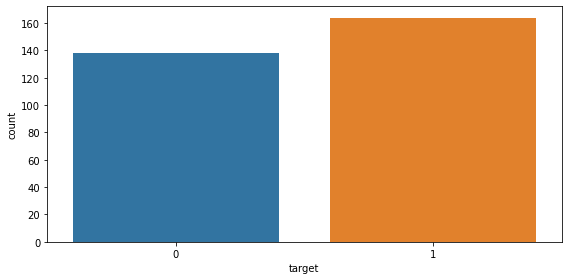

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df)
plt.tight_layout()

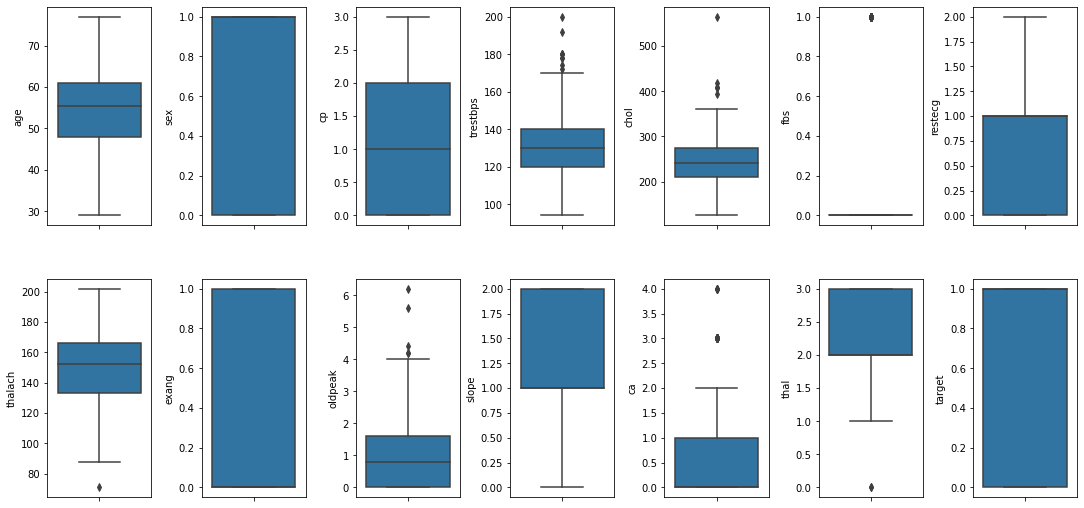

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15,7))
index = 0
axs = axes.flatten()
for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, h_pad=5.0, w_pad=1.0)

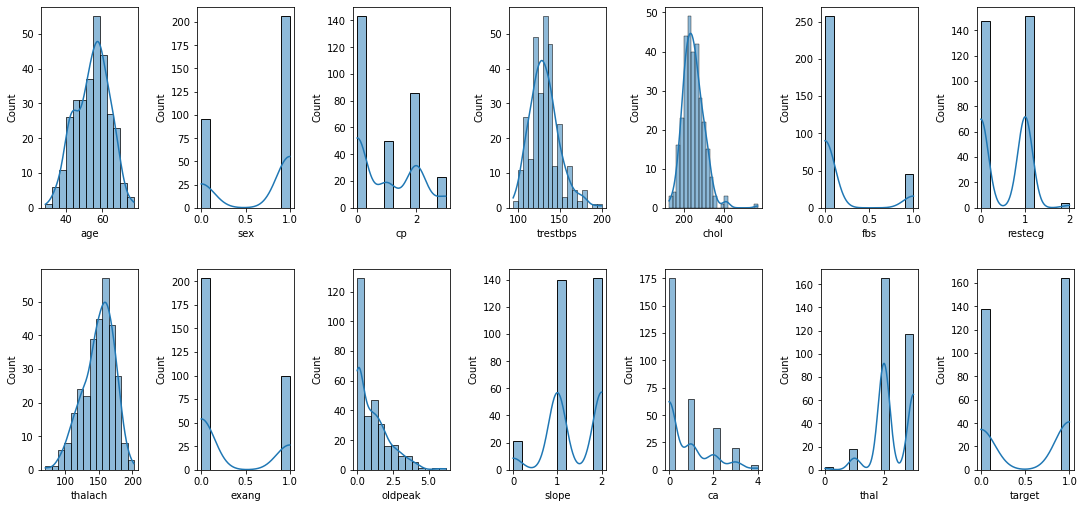

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15,7))
index = 0
axs = axes.flatten()
for col, values in df.items():
    sns.histplot(df[col], kde=True, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.5, h_pad=3.0, w_pad=1.5)

<AxesSubplot:xlabel='sex', ylabel='count'>

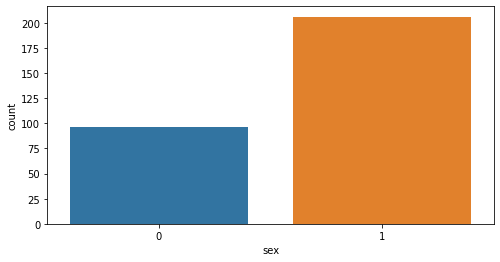

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

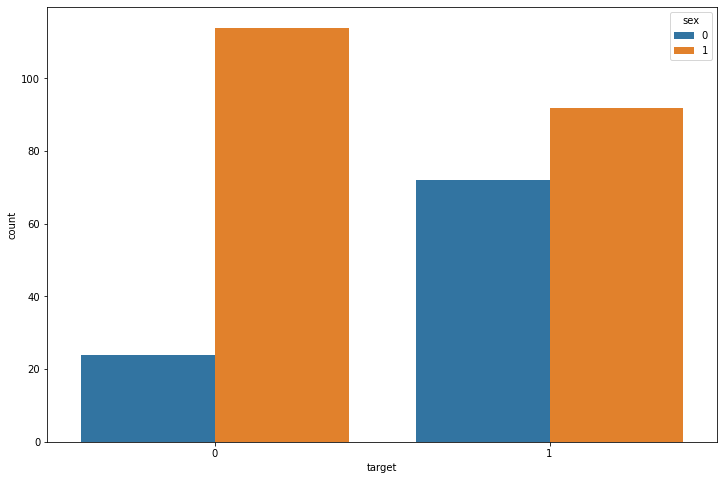

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='target', data=df, hue='sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

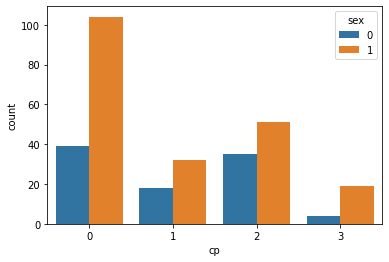

In [16]:
sns.countplot(x='cp', data=df, hue='sex')

<AxesSubplot:xlabel='cp', ylabel='count'>

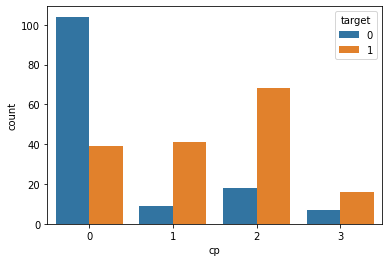

In [17]:
sns.countplot(x='cp', data=df, hue='target')

<AxesSubplot:xlabel='fbs', ylabel='count'>

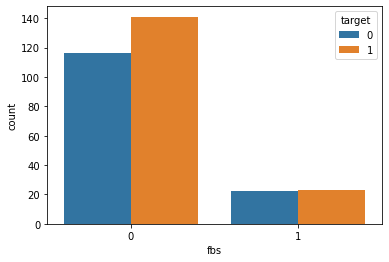

In [18]:
sns.countplot(x='fbs', data=df, hue=df['target'])

In [19]:
def restbps(data):
    if data <= 120:
        return 0
    if 121 <= data <= 129:
        return 1
    if 130 <= data <= 139:
        return 2
    if 140 <= data <= 159:
        return 3
    if 160 <= data <= 179:
        return 4
    if data >= 180:
        return 5

df['cat_trest'] = df['trestbps'].apply(restbps)

<AxesSubplot:xlabel='cat_trest', ylabel='count'>

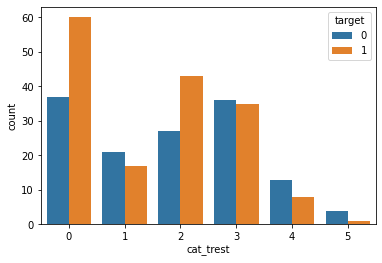

In [20]:
sns.countplot(x='cat_trest', data=df, hue='target')

In [21]:
def chol(x):
    if x < 200:
        return 0
    return 1

df['cat_chol'] = df['chol'].apply(chol)

<AxesSubplot:xlabel='cat_chol', ylabel='count'>

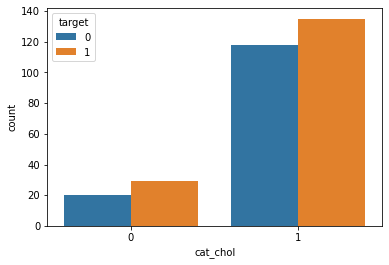

In [22]:
sns.countplot(x='cat_chol', data=df, hue='target')

In [23]:
def cat_thalach(x,y):
    if 220 - x > y:
        return 1
    else:
        return 0
df['cat_thalach'] = df[['age', 'thalach']].apply(lambda x: cat_thalach(x[0], x[1]), axis=1)

<AxesSubplot:xlabel='cat_thalach', ylabel='count'>

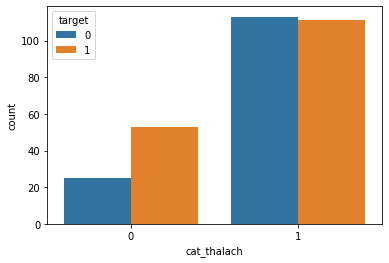

In [24]:
sns.countplot(x='cat_thalach', data=df, hue='target')

<AxesSubplot:xlabel='thal', ylabel='count'>

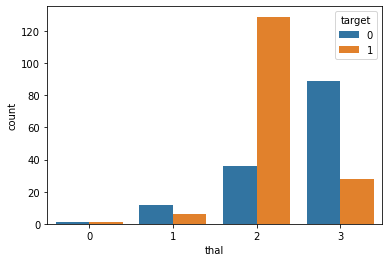

In [25]:
sns.countplot(x='thal', data=df, hue='target')

<AxesSubplot:xlabel='cp', ylabel='count'>

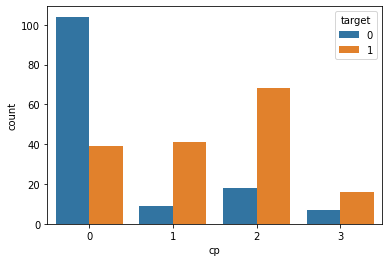

In [26]:
sns.countplot(x='cp', data=df, hue='target')

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cat_trest,cat_chol,cat_thalach
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,1,0


In [28]:
df.shape

(302, 17)

In [29]:
df.drop(['trestbps','chol','thalach'],axis=1,inplace=True)

In [30]:
df.shape

(302, 14)

In [31]:
df.head()

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,cat_trest,cat_chol,cat_thalach
0,63,1,3,1,0,0,2.3,0,0,1,1,3,1,1
1,37,1,2,0,1,0,3.5,0,0,2,1,2,1,0
2,41,0,1,0,0,0,1.4,2,0,2,1,2,1,1
3,56,1,1,0,1,0,0.8,2,0,2,1,0,1,0
4,57,0,0,0,1,1,0.6,2,0,2,1,0,1,0


<AxesSubplot:>

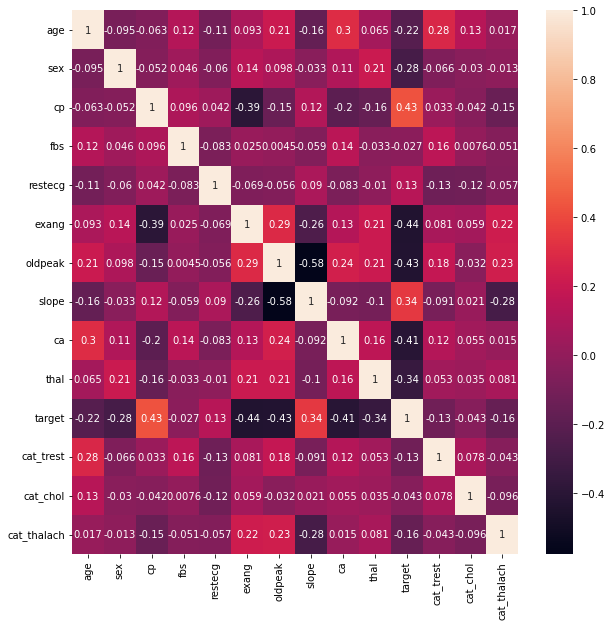

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          302 non-null    int64  
 1   sex          302 non-null    int64  
 2   cp           302 non-null    int64  
 3   fbs          302 non-null    int64  
 4   restecg      302 non-null    int64  
 5   exang        302 non-null    int64  
 6   oldpeak      302 non-null    float64
 7   slope        302 non-null    int64  
 8   ca           302 non-null    int64  
 9   thal         302 non-null    int64  
 10  target       302 non-null    int64  
 11  cat_trest    302 non-null    int64  
 12  cat_chol     302 non-null    int64  
 13  cat_thalach  302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 43.5 KB


In [34]:
df.isna().sum()

age            0
sex            0
cp             0
fbs            0
restecg        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
target         0
cat_trest      0
cat_chol       0
cat_thalach    0
dtype: int64

In [35]:
X = df.drop(['target'],axis=1)
y = df['target']

In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [37]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(241, 13) (61, 13)
(241,) (61,)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
rnd_clf = RandomForestClassifier(n_estimators=130)
rnd_clf.fit(X_train,y_train)
accuracy_train = rnd_clf.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 100.0 Percentage
Accuracy for Testing : 88.52 Percentage


In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



Text(0.5, 1.0, 'Confusion Matrix')

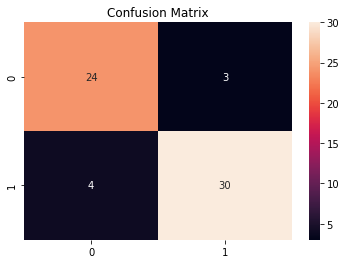

In [41]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')